In [28]:
# Libraries Import

# pandas
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import svm

In [2]:
# get input files as a DataFrame
train_df = pd.read_csv("../input/train.csv")
test_df  = pd.read_csv("../input/test.csv")

### Preview

In [3]:
train_df.info()
print('-----------------------------------------------')
test_df.info()

train_df.shape
test_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(28000, 784)

In [4]:
train_df.head(5)
#test_df.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### take a fraction of the samples

In [58]:
fraction = train_df[0:5000]
fraction_test = train_df[5000:6000]
#fraction

In [59]:
fraction_img = fraction.iloc[:, 1 : 785]
fraction_label = fraction.iloc[:, 0]
test_img = fraction_test.iloc[:, 1 : 785]
test_label = fraction_test.iloc[:, 0]

### visualisation

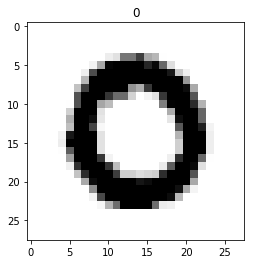

In [46]:
i = 1
img=fraction_img.iloc[i, :].as_matrix()
img=img.reshape((28, 28))
plt.imshow(img, cmap=cm.binary)
plt.title(fraction.iloc[i, 0])

(array([ 566.,   17.,   12.,   11.,    3.,    9.,    9.,   11.,    7.,  139.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

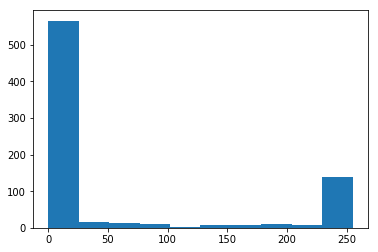

In [47]:
plt.hist(fraction.iloc[i, 1 : 785])

In [60]:
clf = svm.SVC()
clf.fit(fraction_img, fraction_label.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
clf.score(test_img[:500], test_label[:500])

0.104

/Users/tlenglin/Library/Python/3.4/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/tlenglin/Library/Python/3.4/lib/python/site-packages/pandas/core/frame.py:2366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/Users/tlenglin/Library/Python/3.4/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

(array([ 687.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   97.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

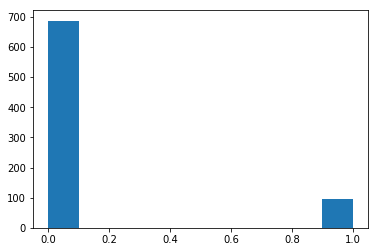

In [78]:
fraction_img[fraction_img > 0] = 1
test_img[test_img > 0] = 1
#fraction_img.shape
plt.hist(fraction_img.iloc[0])

In [76]:
clf = svm.SVC()
clf.fit(fraction_img, fraction_label.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
clf.score(test_img[:500], test_label[:500])

0.12